In [1]:
import numpy as np
from classfunctions import NbodyClass
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

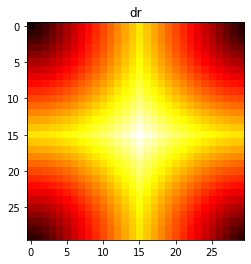

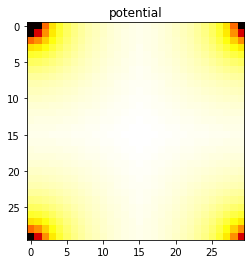

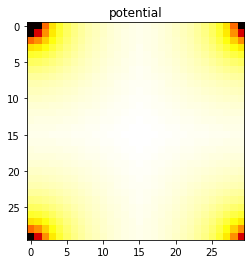

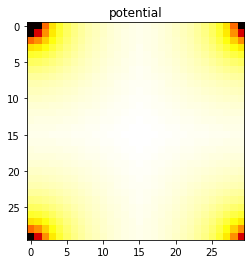

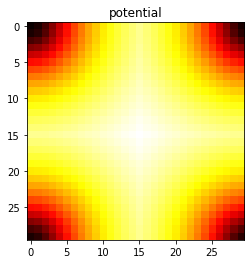

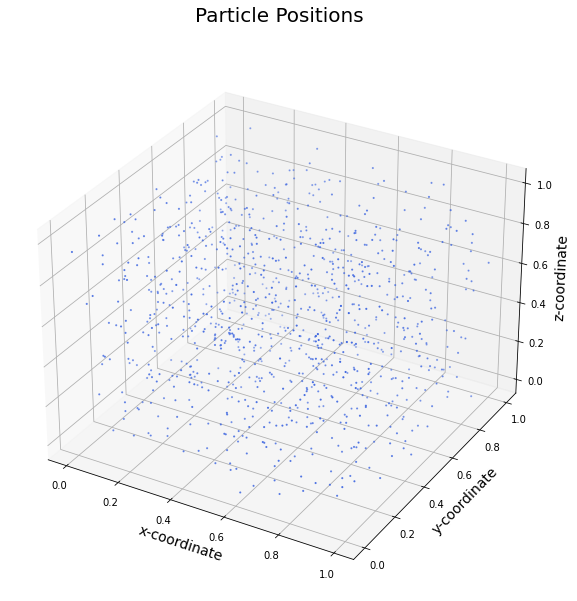

In [2]:
#import class let's go
pos = np.random.rand(3, 1000)
v = np.random.rand(3, 1000)
nbody = NbodyClass(pos, v, ngrid=30, dt=100)
# nbody.run_nbody()
nbody.plot_positions()

Leapfrog: 
Velocity and position half a timestep out of sync. Velocity is therefore average btwn two positions, position is average position btwn two velocities. 2nd order with no extra work.
BUT can't change timestep. That's fine. Use fixed timestep.
LEAPFROGGING: only update v HALF of the way. pretend velocity is t + 1/2, position at time t.
Nov 2, 7 minutes.
Update forces based on x position HALFWAY through timestep. getting average basically.

Softening: particles fuzzy balls, bring them close and the force should drop, rather than explode as 1/r^2 with the force. Example:

$F ~ \frac{r}{(r^2 + eps^2)^{3/2}}$

Potential:
Global potential is the potential from a SINGLE PARTICLE, convolved with the density field.
Force is the GRADIENT of the potential.
FFT nlogn <<< n^2 for lots of particles.

Scheme:
- make a GRID to calculate the density
- SUM particles onto nearest grid cell
- convolve with desired potential
- have potential, for each particle, calculate GRADIENT of potential at its position


MY MAIN QUESTIONS:
Cells:
how big are CELLS supposed to be compared to movement?
can't have particles travelling further than one cell over, right? or simulation breaks down / timestep too large

Boundary conditions:
what was that thing about guard cells?

Scale:
does it make sense to use the atomic mass and radius? why multiply super tiny numbers if we don't have to though?

Self-energy:
Remove it. How to with potential? add in a single potential term?

Plotting:
plot every x steps? or plot after waiting a certain amount of time?

SANITY CHECKS:
single particle at rest stays at rest
two particles continue to orbit
    - can check forces equal and opposite
    - particles should not be able to move farther apart then they started
   
 
